<a href="https://colab.research.google.com/github/odraudE31/AE_398_Azul_Project/blob/main/src/plotters/Azul_project_dudu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

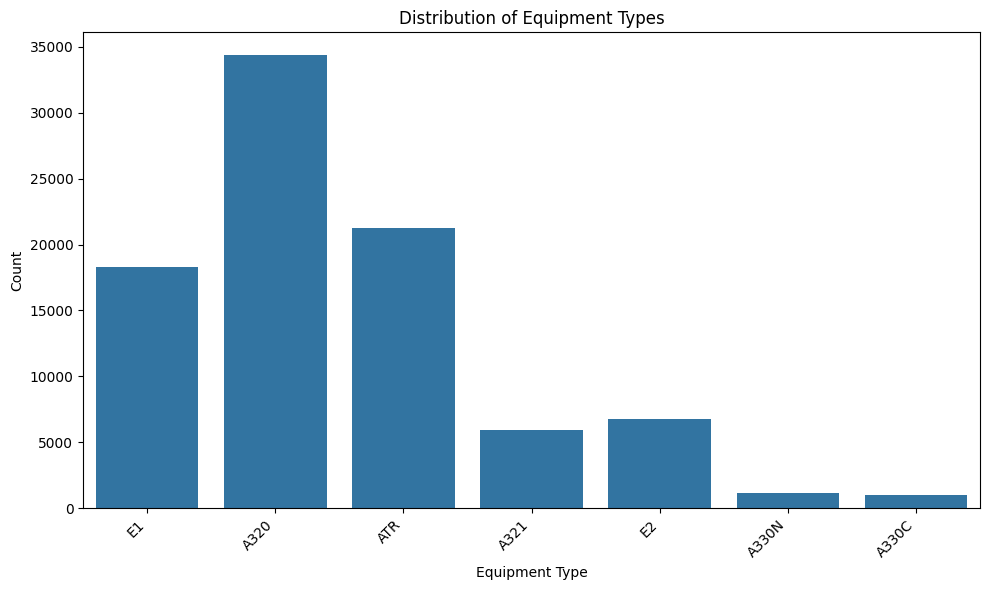

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe, use engine instead of encoding
df = pd.read_excel('/content/drive/MyDrive/Aligned_APU_to_D0D14 (third iteration)', engine='openpyxl')

# Create the plot.
plt.figure(figsize=(10, 6))
sns.countplot(x='equipmenttype', data=df)
plt.title('Distribution of Equipment Types')
plt.xlabel('Equipment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

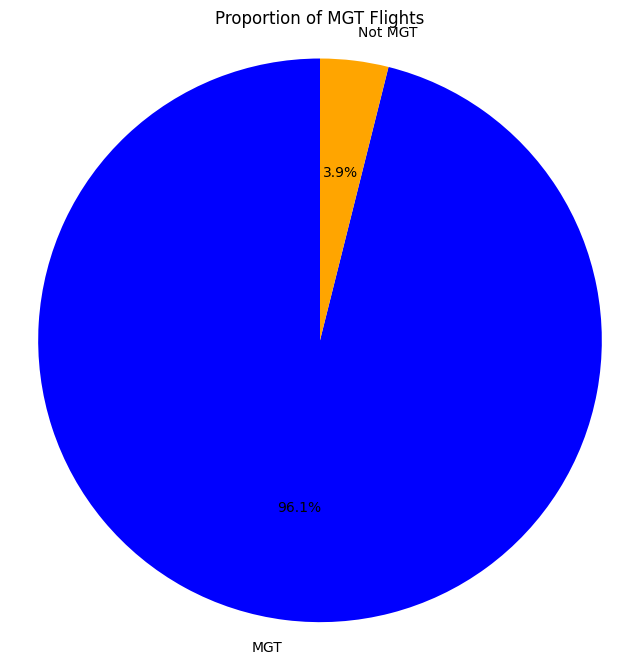

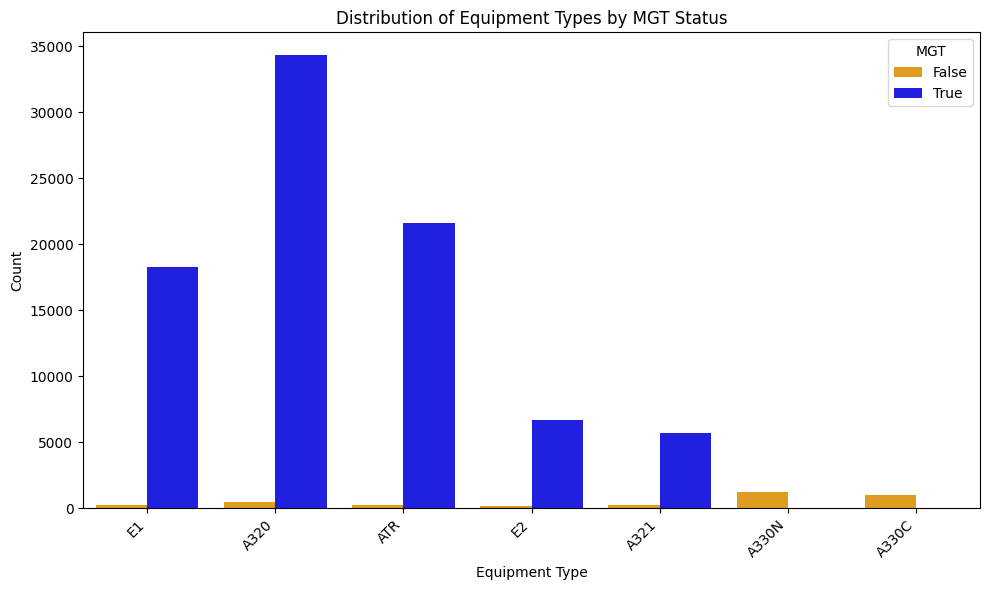

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aircraft MGT dictionary
aircrafts = {
    'ATR': 30,
    'E1': 35,
    'E2': 40,
    'A320': 40,
    'A321': 50,
}

# Load the dataframe
df = pd.read_excel('/content/Aligned_APU_to_D0D14 (sixth iteration).xlsx', engine='openpyxl')

# Function to determine if a flight is MGT based on ground time and aircraft type
def is_mgt(row):
  equipment_type = row['equipmenttype']
  ground_time = row['groundtime_realized_min']
  if equipment_type in aircrafts:
    return ground_time >= aircrafts[equipment_type]
  else:
    return False  # Handle cases where aircraft type is not in the dictionary


# Apply the function to create a new 'MGT' column
df['MGT'] = df.apply(is_mgt, axis=1)

# Create the pie chart
mgt_counts = df['MGT'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mgt_counts, labels=['MGT', 'Not MGT'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange']) # Swapped labels here
plt.title('Proportion of MGT Flights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# If you want a countplot of equipment type colored by MGT status:
plt.figure(figsize=(10, 6))
sns.countplot(x='equipmenttype', hue='MGT', data=df, palette={True: 'blue', False: 'orange'})
plt.title('Distribution of Equipment Types by MGT Status')
plt.xlabel('Equipment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()